# activation 별 설정해야하는 loss

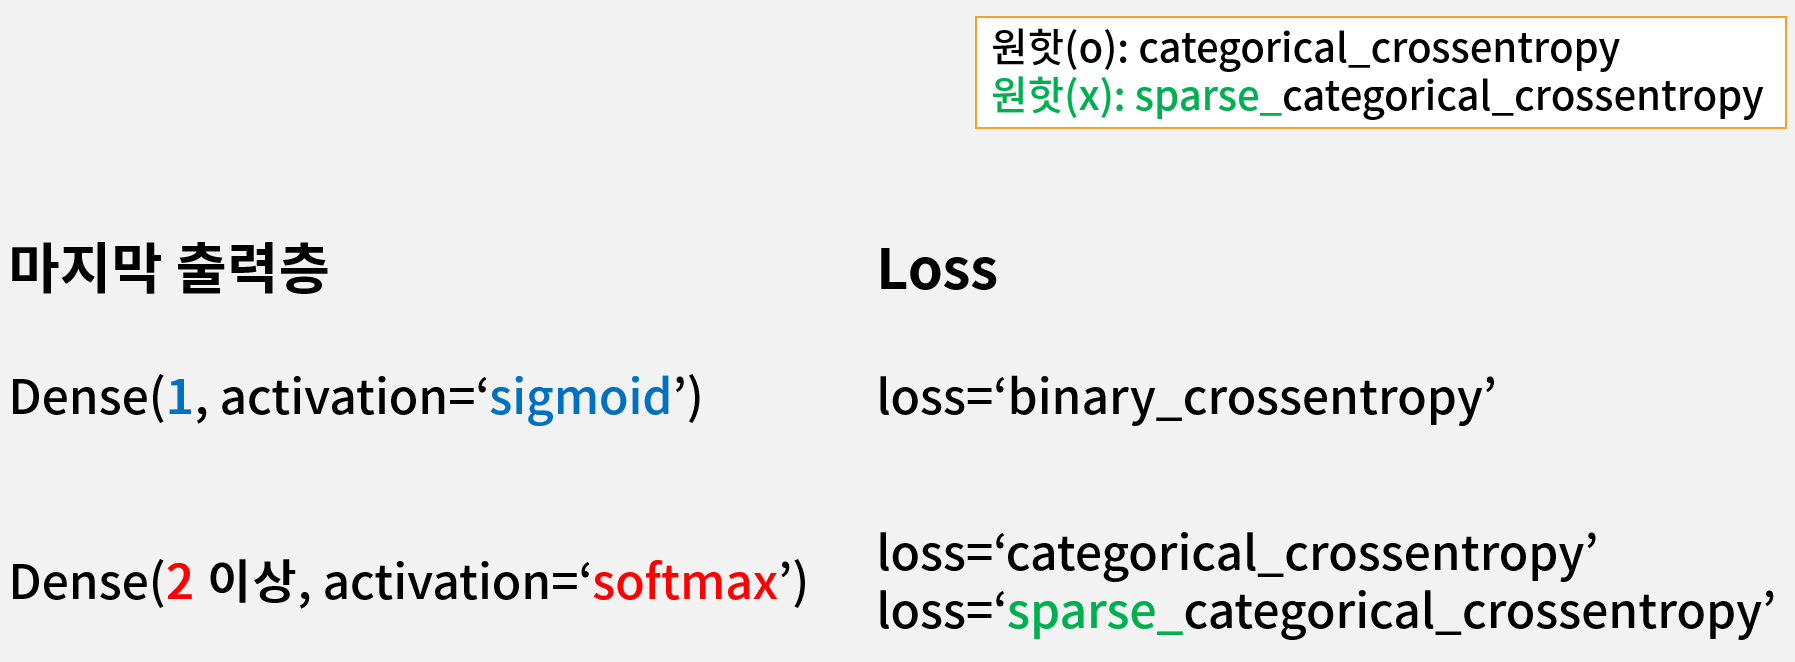

# **Category 2**
* Fully Connected Layer을 활용한 이미지 분류

Create a classifier for the Fashion MNIST dataset

Note that the test will expect it to classify 10 classes and that 

the input shape should be the native size of the Fashion MNIST dataset which is 28x28 monochrome. 

Do not resize the data. Your input layer should accept

(28,28) as the input shape only. 

If you amend this, the tests will fail.

Fashion MNIST 데이터 셋에 대한 분류기 생성
테스트는 10 개의 클래스를 분류 할 것으로 예상하고

입력 모양은 Fashion MNIST 데이터 세트의 기본 크기 여야합니다.28x28 단색. 

데이터 크기를 조정하지 마십시오. input_shape는
(28,28)을 입력 모양으로 만 사용합니다. 

## 1.import 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## 2.Load dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [48]:
(x_train, y_train) , (x_valid, y_valid) = fashion_mnist.load_data()

In [12]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [49]:
y_train.shape, y_valid.shape

((60000,), (10000,))

**이미지 정규화**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화 해 줍니다.
* x_train, x_valid 에 대해서만 정규화합니다.

정규화 전 최소값, 최대값 확인

In [14]:
x_train.min(), x_train.max()

(0, 255)

정규화

In [15]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

정규화 후 최소값, 최대값 확인

In [16]:
x_train.min(), x_train.max()

(0.0, 1.0)

## 3.샘플데이터 Visualization

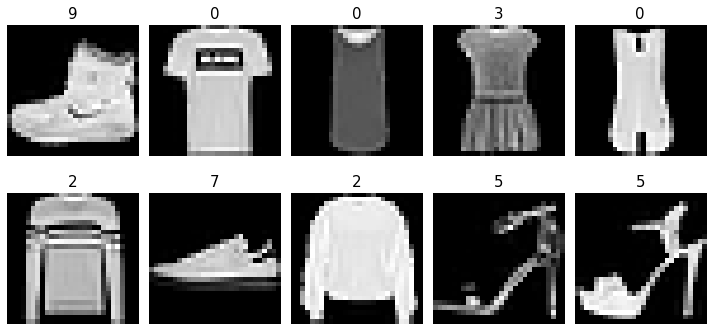

In [17]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10,5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap='gray')
  axes[i//5, i%5].set_title(str(y_train[i]), fontsize=15)
  plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
  axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

## 4.Flatten Layer

* 고차원을 1D로 변환하여 **Dense Layer에 전달**해 주기 위하여 사용합니다.
* 28 X 28 의 **2D**로 되어 있는 이미지를 784로 **1D로 펼쳐 주는 작업**입니다.

In [18]:
# 변환 전
x_train.shape

(60000, 28, 28)

In [21]:
# 변환 후
x = Flatten(input_shape=(28, 28))
print(x(x_train).shape)

(60000, 784)


## 5.Activation Function

In [22]:
from IPython.display import Image


####**relu**

In [24]:
def relu(x):
  return np.maximum(x,0)

In [25]:
x = np.linspace(-10, 10)
y = relu(x)

<function matplotlib.pyplot.show>

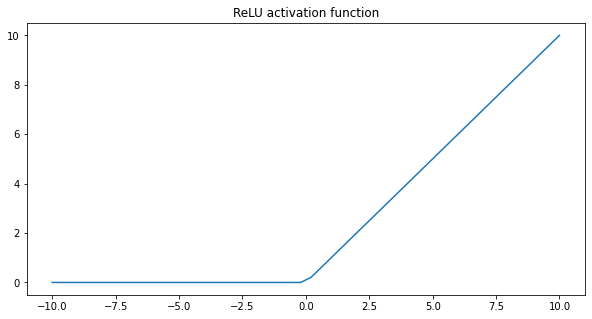

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title('ReLU activation function')
plt.show

**Dense Layer에 ReLU activation 적용**

In [27]:
Dense(20, activation='relu')

#### **Sigmoid**



$\displaystyle s(z) = \frac{1}{1+e^{-z}}$

$z$ 값을 0과 1사이의 값으로 바꾸는 함수

**Sigmoid 함수 원리**

$\frac{1}{1} = 1$인데, 분모 1에다 0보다 크거나 같은 어떤 수를 더 하면 그 결과는 1 보다 클수 없다.

분모에 더 할 값은 $e^{-z}$, 이 값은 어떤 $z$가 주어져도 0보다 작아 지지 않는다.

$e^{-z}$는 $z$의 값이 크면 클 수록 0에 가까운 작은 수가 되고 $z$값이 작으면 무한대에 가까운 큰 수가 된다

따라서 $z$의 값이 크면 $e^{-z}$의 값이 작아져서 $\frac{1}{1+e^{-z}}$의 값은 1에 가까워 지고 그 반대는 0에 가까워 진다.

In [28]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))
  

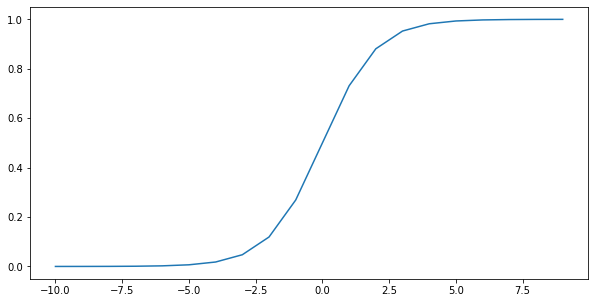

In [29]:
x = np.arange(-10, 10)
y = sigmoid(x)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.show()

#### **Softmax**

뉴런의 출력값에 대하여 class 분류를 위하여 마지막 단계에서 출력값에 대한 정규화를 해주는 함수이다.

사진속 인물이 지금 슬픈 표정인지, 웃는 표정인지, 화난 표정인지 확률적으로 수치화한다고 했을때,

슬픔 (11%), 웃음 (29%), 화남(60%) 화같이 확률적 classification 을 할 때 용이하다.

소프트맥스 함수의 특징은 **확률의 합은 언제나 1.0** 이다

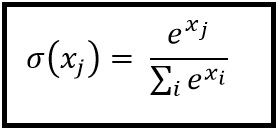

In [31]:
Image('https://i.stack.imgur.com/wxJKQ.jpg')

In [32]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [33]:
a = np.random.uniform(low=0.0, high=10.0, size=3)
y = softmax(a)

In [35]:
print("Class 별 확률 값 출력")
print('===' * 10)
for i in range(3):
  print(f'Class {i}의 확률 : {y[i]:.3f}')
print('===' * 10)
print('Class 별 확률 값의 합 : {:.1f}'.format(y.sum()))

Class 별 확률 값 출력
Class 0의 확률 : 0.279
Class 1의 확률 : 0.090
Class 2의 확률 : 0.632
Class 별 확률 값의 합 : 1.0


다중분류의 맨 마지막 출력층 활성함수로는 Dense layer에 'softmax'를 적용합니다.

* 단, Dense 레이어의 unit이 2보다 크거나 같은 경우에만 해당합니다. (만약, 1이라면 'sigmoid'를 활성함수로 설정합니다)


In [36]:
Dense(10, activation='softmax')

## 6.모델 정의 (Sequential)


`Sequential` 모델 안에서 층을 깊게 쌓아 올려 주면 됩니다.

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못합니다. Flatten 레이어로 2D -> 1D로 변환해주세요
2. 깊은 출력층과 더 많은 Layer를 쌓습니다.
3. Dense Layer에 `activation='relu'`를 적용합니다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 합니다.

In [38]:
model = Sequential([
                    # Flatten
                    Flatten(input_shape=(28, 28)),
                    # Dense Layer
                    Dense(1024, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    # softmax
                    Dense(10, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                6

## 7.Compile

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`설정
  * 출력층 activation이 `sigmoid` 인 경우: `binary_crossentropy`
  * 출력층 activation이 `softmax` 인 경우: 
    * 원핫인코딩(O): `categorical_crossentropy`
    * 원핫인코딩(X): `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

**원핫인코딩 여부 체크방법**

In [40]:
y_train[0]

9

In [41]:
print(tf.one_hot(y_train[0], 10))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)


**model.compile()**

In [42]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

## 8.ModelCheckpoint

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

In [43]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(filepath= checkpoint_path,
                             save_weights_only = True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose= 1)

## 9.학습(fit)

1. `validation_data`를 반드시 지정합니다.
2. `epochs`을 적절하게 지정합니다.
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정합니다.

In [45]:
# history는 시각화해보기 위해 선언한것이지 필수는 아님
history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_vailid),
                    epochs= 20,
                    callbacks=[checkpoint]
                    )

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5047 - acc: 0.8184 - val_loss: 0.4112 - val_acc: 0.8534

Epoch 00001: val_loss improved from inf to 0.41124, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3780 - acc: 0.8627 - val_loss: 0.3884 - val_acc: 0.8601

Epoch 00002: val_loss improved from 0.41124 to 0.38841, saving model to my_checkpoint.ckpt
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3423 - acc: 0.8747 - val_loss: 0.3648 - val_acc: 0.8705

Epoch 00003: val_loss improved from 0.38841 to 0.36479, saving model to my_checkpoint.ckpt
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3169 - acc: 0.8837 - val_loss: 0.3558 - val_acc: 0.8725

Epoch 00004: val_loss improved from 0.36479 to 0.35584, saving model to my_checkpoint.ckpt
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2967 - acc: 0.8905 - v

## 10.학습완료 후 Load Weights
학습이 완료된 후에는 반드시 **`load_weights`**를 해주어야 합니다.

In [46]:
model.load_weights(checkpoint_path)

## 11.학습 후 검증하고자 한다면

In [50]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 52.0614 - acc: 0.8482


[52.0614013671875, 0.8482000231742859]

## 12.학습 Loss(오차)에 대한 시각화

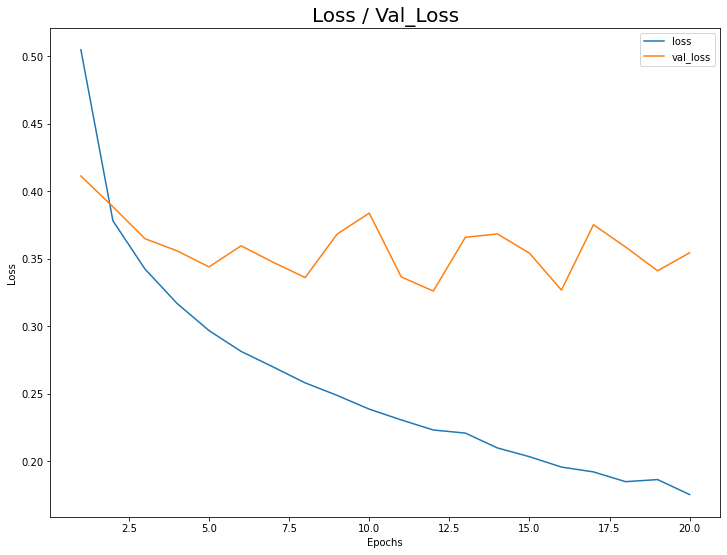

In [54]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val_Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=10)
plt.show()

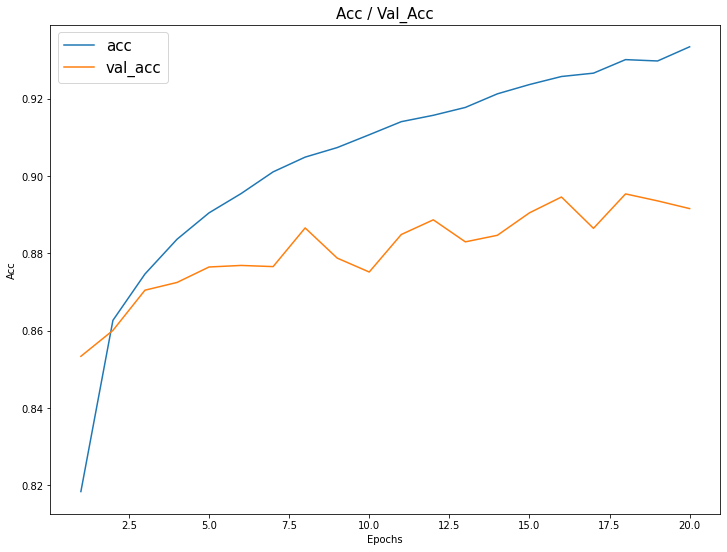

In [57]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val_Acc', fontsize=15)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc','val_acc'], fontsize=15)
plt.show()

# Review

Create a classifier for the Fashion MNIST dataset

Note that the test will expect it to classify 10 classes and that 

the input shape should be the native size of the Fashion MNIST dataset which is 28x28 monochrome. 

Do not resize the data. Your input layer should accept

(28,28) as the input shape only. 

If you amend this, the tests will fail.

In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [59]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

print(x_train.shape, x_valid.shape)
print(y_train.shape, y_valid.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [60]:
# normalization
x_train = x_train / 255
x_valid = x_valid / 255

print(x_train.min(), x_train.max())

0.0 1.0


In [62]:
# model 정의
model = Sequential([
                  Flatten(input_shape=(28, 28)),
                  # Dense
                  Dense(1024, activation='relu'),
                  Dense(512, activation='relu'),
                  Dense(256, activation='relu'),
                  Dense(128, activation='relu'),
                  Dense(64, activation='relu'),
                  # Softmax
                  Dense(10, activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [64]:
# 원핫인코딩 여부 체크
y_train[0]

9

In [65]:
# compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [66]:
# ModelCheckpoint
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss',
                             verbose = 1,
                             save_weights_only=True,
                             save_best_only=True)

In [67]:
# fit
model.fit(x_train, y_train,
          validation_data = (x_valid, y_vailid),
          epochs= 20,
          callbacks= [checkpoint])

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5033 - acc: 0.8167 - val_loss: 0.4150 - val_acc: 0.8545

Epoch 00001: val_loss improved from inf to 0.41497, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3809 - acc: 0.8615 - val_loss: 0.3928 - val_acc: 0.8559

Epoch 00002: val_loss improved from 0.41497 to 0.39279, saving model to my_checkpoint.ckpt
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3451 - acc: 0.8732 - val_loss: 0.3623 - val_acc: 0.8689

Epoch 00003: val_loss improved from 0.39279 to 0.36230, saving model to my_checkpoint.ckpt
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3171 - acc: 0.8834 - val_loss: 0.3748 - val_acc: 0.8694

Epoch 00004: val_loss did not improve from 0.36230
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2972 - acc: 0.8909 - val_loss: 0.3711 - val_acc: 0.8743

Epoch

In [68]:
model.load_weights(checkpoint_path)

In [70]:
# 학습 후 검증
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.3450 - acc: 0.8835


[0.3449781835079193, 0.8834999799728394]